# PS.8 (conditioning, stability)

Verify that $\|\cdot\|_2:\mathbb{R}^n\rightarrow \mathbb{R}$ is partially well-conditioned. Prove that it is also well-conditioned.


## Solution

The partial conditioning of $f:\mathbb{R}^n\rightarrow\mathbb{R}$ is 

\begin{align*}
\hat{\kappa}_f(x) & = \sum_{i=1}^n \hat{\kappa}^i_f(x) \\
& = \sum_{i=1}^n |\partial_i f(x)|\frac{|x_i|}{|f(x)|}\\
& = \sum_{i=1}^n \left|\partial_i \sqrt{x_1^2+\ldots+x_n^2}\right|\frac{|x_i|}{\|x\|_2}\\
& = \sum_{i=1}^n \left|\frac{2x_i}{2\|x\|_2}\right|\frac{|x_i|}{\|x\|_2}\\
& = \sum_{i=1}^n \frac{|x_i|^2}{\|x\|_2^2} = 1
\end{align*}

The Jacobian of $f$ is 

$$
J_f(x) = \frac{x^\top}{\|x\|_2}.
$$

The absolute conditioning with respect to the Frobenius-norm is 

$$
\kappa^{\mathop{abs}}_f(x)= \|J_f(x)\|_F=1.
$$

(Since $J_f$ is a single row, its spectral norm coincides with the Frobenius norm, i.e., $\|J_f(x)\|_2=\|J_f(x)\|_F$).

The relative conditioning is

$$
\kappa_f(x)= \kappa^{\mathop{abs}}_f(x)\frac{\|x\|_2}{\|x\|_2}=1.
$$

# PS.8 (matrix norms)

Consider the $3$ matrix norms $ \|\cdot\|_1$, $\|\cdot\|_2$, and $\|\cdot\|_\infty$ that induce the condition numbers $\kappa_1$, $\kappa_2$, and $\kappa_\infty$. For $A,B\in\mathbb{R}^{n\times n}$ invertible, verify the following claims for $p=1,2,\infty$:

a) $\kappa_p(A)\geq 1$,

b) $\kappa_p(AB) \leq \kappa_p(A)\kappa_p(B)$.

## Solution

a) These matrix norms are operator norms, hence, submultiplicative. Therefore, we derive

$$
\kappa_p(A) = \|A\|_p \|A^{-1}\|_p \geq \|A A^{-1}\|_p = \|I_n\|_p=1
$$

b) Submultiplicativity yields

\begin{align*}
\kappa_p(AB) & = \|AB\|_p \|(AB)^{-1}\|_p \\
& = \|AB\|_p \|B^{-1}A^{-1}\|_p\\
& \leq \|A\|_p \|B\|_p \|B^{-1}\|_p \|A^{-1}\|_p\\
& = \kappa_p(A)\kappa(B)_p.
\end{align*}

# PS.8 (qr-decomposition)

Suppose that the qr-decomposition of $A\in\mathbb{R}^{5\times 3}$ is given by $A=QR$ with 

\begin{equation*}
Q = \begin{pmatrix} 
*&1&*&*&*\\
1& 0 &0& 0&0\\
0&0&0&0&1\\
0&0&0&1&0\\
0&0&1&*&0\\
\end{pmatrix},\qquad 
R = \begin{pmatrix} 
3&1&1\\
0&2&1\\
0 &0&1\\
0&0&0\\
0& 0 & 0 
\end{pmatrix},
\end{equation*}
where "$*$" means you still need to reconstruct those entries.


Find the solution $\hat{x}\in\mathbb{R}^3$ of the linear least squares problem 
\begin{equation*}
\arg\min_{x\in\mathbb{R}^3}\|Ax-b\|^2_2,\qquad b=(1,6,3,4,5)^\top.
\end{equation*}

## Solution

Since $Q$ has orthonormal rows and columns, all "*" are $0$. We compute 

$$
Q^\top b = \begin{pmatrix} 
0&1&0&0&0\\
1& 0 &0& 0&0\\
0&0&0&0&1\\
0&0&0&1&0\\
0&0&1&0&0\\
\end{pmatrix} \cdot \begin{pmatrix}
1\\6\\3\\4\\5
\end{pmatrix} = \begin{pmatrix}
6\\1\\5\\4\\3
\end{pmatrix} = \begin{pmatrix}
c_0\\c_1
\end{pmatrix}.
$$

We now solve $R_0\hat{x}=c_0$ with $R_0=\begin{pmatrix} 
3&1&1\\
0&2&1\\
0 &0&1
\end{pmatrix}
$ and $c_0=\begin{pmatrix}
6\\1\\5
\end{pmatrix}$. Backsubstitution leads to 

$$
\hat{x} = \begin{pmatrix}
1
\\
-2\\
5
\end{pmatrix}
$$

# PS.8 (modified Newton's method)

Implement the modified Newton's method and apply your program to 

$$
f(x) = (x^2-2)^2
$$

with initial value $x_0=1$. Apply also Newton's method (solutions to PS.6 are at the moodle website) and compare the errors of both methods in a logarithmic plot.

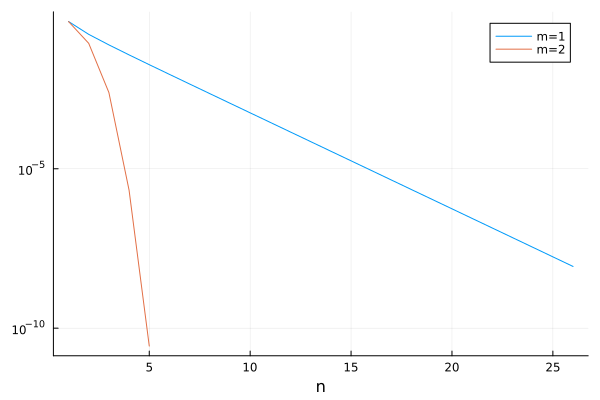

In [2]:
function myNewton(f, ∂f, x0; m=1, tol=1e-5, maxiter=50)
    x = Vector{Float64}(undef,maxiter)
    x[1] = copy(x0)
    for k in 1:maxiter-1
        if abs(f(x[k]))<tol return x[1:k] end
        x[k+1] = x[k]-m*f(x[k])/∂f(x[k])
    end
    println("max iterations reached")
    return x
end


using Calculus:derivative
using Plots:plot,plot!

f(x) = (x^2-2)^2
∂f = derivative(f)

x = myNewton(f, ∂f, 1; m=1, tol=4*eps(), maxiter=100)  # m = 1
y = myNewton(f, ∂f, 1; m=2, tol=4*eps(), maxiter=100)  # m = 2

err_x = abs.(sqrt(2).-x)
err_y = abs.(sqrt(2).-y)

plot(err_x, yaxis=:log, label="m=1",xlabel="n")
plot!(err_y, label="m=2")